Intuition behind SVM:
Support Vector Machines are a powerful supervised learning algorithm used for classification and regression tasks. The key idea behind SVM is to find the optimal hyperplane that maximally separates the classes while maintaining a margin of separation. This margin is defined as the distance between the hyperplane and the closest data points from each class, known as support vectors.

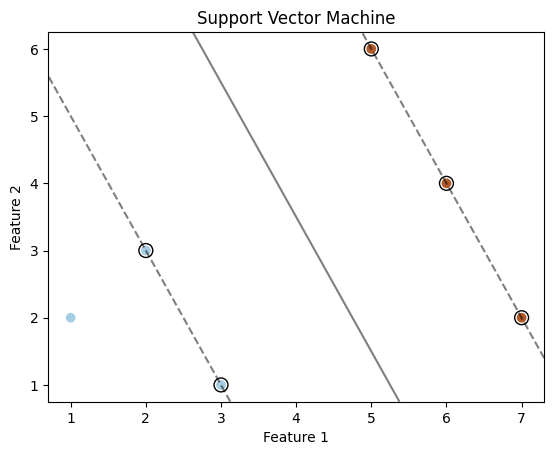

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Create example data
X = np.array([[1, 2], [2, 3], [3, 1], [6, 4], [7, 2], [5, 6]])
y = np.array([0, 0, 0, 1, 1, 1])

# Create SVM classifier
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

# Plot data points and decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model predictions
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Support Vector Machine')
plt.show()


Support Vector Machines (SVM) is a supervised machine learning algorithm used for classification and regression tasks. The algorithm finds an optimal hyperplane in a high-dimensional feature space that separates the data points of different classes as widely as possible. In this response, I will focus on the algorithm for binary classification.

Here are the main steps involved in the Support Vector Machine algorithm:

Data Preparation:

Collect and preprocess the labeled training data, ensuring that the features are numerical and appropriately scaled.
Feature Mapping (Optional):

If the data is not linearly separable in the original feature space, you may apply a kernel function to map the data into a higher-dimensional feature space. This transformation allows the algorithm to find a linear separation in that space.
Model Training:

Select the appropriate hyperparameters, such as the regularization parameter C and the kernel type (linear, polynomial, radial basis function, etc.).
Initialize the SVM model with the chosen hyperparameters.
Solve the optimization problem to find the optimal hyperplane that maximizes the margin and minimizes the classification errors.
The optimization problem involves finding the support vectors, which are the data points closest to the decision boundary.
Model Evaluation:

Test the trained model on the unseen test data to assess its performance.
Use evaluation metrics such as accuracy, precision, recall, or F1 score to measure the model's effectiveness.
Now, let's dive into the core mathematical concepts of SVM:

Margin:

SVM aims to maximize the margin, which is the distance between the decision boundary and the nearest training data points from each class. This margin ensures better generalization and robustness.
Decision Function:

The decision function is used to classify new data points. It calculates the signed distance from the data point to the decision boundary and assigns a class label based on the sign of the distance.
Optimization Problem:

SVM solves a constrained optimization problem to find the hyperplane that maximizes the margin while satisfying a set of constraints.
The optimization problem involves minimizing a cost function that penalizes data points inside the margin or misclassified.
The regularization parameter C controls the trade-off between maximizing the margin and minimizing the classification errors.
Support Vectors:

Support vectors are the data points that lie on the margin or are misclassified. They play a crucial role in defining the decision boundary.
These vectors influence the hyperplane's position and orientation and are used to make predictions for new data points.
Overall, the SVM algorithm aims to find the optimal hyperplane that separates the data points of different classes with the maximum margin while considering the impact of support vectors. By doing so, SVM provides an effective method for binary classification tasks.

In Support Vector Machines (SVM), the concepts of soft margin and hard margin refer to the approach taken when dealing with non-linearly separable data.

Hard Margin SVM:

Hard margin SVM is used when the training data is perfectly separable into two classes by a linear decision boundary.
The goal of hard margin SVM is to find the hyperplane that completely separates the classes without any misclassifications.
In this case, the SVM algorithm aims to maximize the margin while ensuring that all training data points are correctly classified.
If the data is linearly separable, hard margin SVM can provide a simple and effective solution.
Soft Margin SVM:

Soft margin SVM is used when the training data is not linearly separable or when there is noise or outliers in the data.
The goal of soft margin SVM is to find a hyperplane that separates the classes with a maximum margin while allowing for some misclassifications.
Soft margin SVM introduces a slack variable for each data point, which represents the degree of misclassification or the distance from the margin.
The slack variables allow for a certain amount of tolerance for misclassifications and errors in the training data.
The SVM algorithm aims to find the hyperplane that maximizes the margin while minimizing the sum of the slack variables and keeping them within a specified limit.
The regularization parameter C controls the trade-off between maximizing the margin and allowing for misclassifications. A smaller C value allows for more misclassifications, while a larger C value imposes stricter constraints.
In practice, soft margin SVM is more commonly used because it can handle more realistic and complex datasets that may not be perfectly separable. It provides a flexible approach that balances the desire for a large margin with the tolerance for misclassifications or noisy data points.

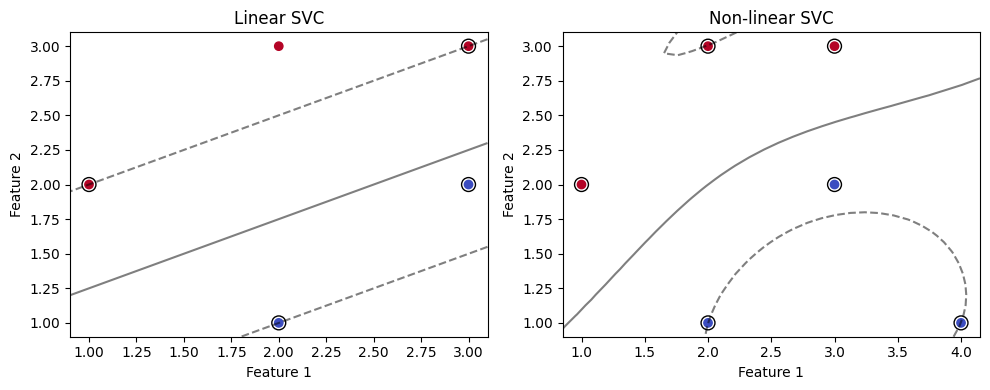

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Linear SVC
# Create linearly separable data
X_linear = np.array([[1, 2], [2, 3], [3, 3], [2, 1], [3, 2]])
y_linear = np.array([1, 1, 1, -1, -1])

# Create and fit the model
linear_svc = svm.SVC(kernel='linear')
linear_svc.fit(X_linear, y_linear)

# Non-linear SVC
# Create non-linearly separable data
X_nonlinear = np.array([[1, 2], [2, 3], [3, 3], [2, 1], [3, 2], [4, 1]])
y_nonlinear = np.array([1, 1, 1, -1, -1, -1])

# Create and fit the model with a non-linear kernel (e.g., RBF)
nonlinear_svc = svm.SVC(kernel='rbf')
nonlinear_svc.fit(X_nonlinear, y_nonlinear)

# Plot the decision boundaries
plt.figure(figsize=(10, 4))

# Linear SVC plot
plt.subplot(1, 2, 1)
plt.scatter(X_linear[:, 0], X_linear[:, 1], c=y_linear, cmap='coolwarm')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create a grid to evaluate the model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = linear_svc.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(linear_svc.support_vectors_[:, 0], linear_svc.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
plt.title('Linear SVC')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Non-linear SVC plot
plt.subplot(1, 2, 2)
plt.scatter(X_nonlinear[:, 0], X_nonlinear[:, 1], c=y_nonlinear, cmap='coolwarm')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create a grid to evaluate the model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = nonlinear_svc.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(nonlinear_svc.support_vectors_[:, 0], nonlinear_svc.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
plt.title('Non-linear SVC')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()


Support Vector Machines (SVM) in terms of the mathematical derivation of the optimization problem it solves. Here's a step-by-step explanation:

Notations:

We have a training dataset with labeled examples: { (x₁, y₁), (x₂, y₂), ..., (xₙ, yₙ) }, where xᵢ is the input vector and yᵢ is the corresponding class label (-1 or +1).
We want to find a hyperplane in the feature space that separates the data points of different classes as widely as possible.
Decision Function:

The decision function for SVM is defined as f(x) = w·x + b, where w is the weight vector, x is the input vector, and b is the bias term.
If f(x) > 0, then x is classified as class +1; otherwise, if f(x) < 0, x is classified as class -1.
Margin:

SVM aims to find the hyperplane with the maximum margin, which is the distance between the hyperplane and the nearest data points of each class.
The distance between a point x and the hyperplane can be calculated as |f(x)| / ||w||, where ||w|| is the Euclidean norm of the weight vector.
Optimization Problem:

SVM solves a constrained optimization problem to find the hyperplane that maximizes the margin while satisfying a set of constraints.

The optimization problem can be formulated as follows:

minimize: (1/2) ||w||²
subject to: yᵢ(w·xᵢ + b) ≥ 1 for all i=1 to n

The objective function (1/2) ||w||² represents the margin, and we want to minimize it.

The constraint yᵢ(w·xᵢ + b) ≥ 1 ensures that the data points are correctly classified and lie outside or on the margin.

These constraints enforce that the data points are well-separated and do not violate the margin.

Lagrangian Formulation:

To solve the constrained optimization problem, we convert it into the Lagrangian formulation and apply the Karush-Kuhn-Tucker (KKT) conditions.
Introduce Lagrange multipliers αᵢ for each constraint: αᵢ ≥ 0 for all i=1 to n.
The Lagrangian function is defined as:
L(w, b, α) = (1/2) ||w||² - ∑ αᵢ[yᵢ(w·xᵢ + b) - 1]
Dual Problem:

The dual problem is obtained by maximizing the Lagrangian function with respect to α while minimizing with respect to w and b.

The dual problem is given as:
maximize: ∑ αᵢ - (1/2) ∑∑ αᵢ αⱼ yᵢ yⱼ xᵢ·xⱼ
subject to: ∑ αᵢ yᵢ = 0, αᵢ ≥ 0 for all i=1 to n

The dual problem is now an optimization problem with respect to the Lagrange multipliers α.

Solution:

The solution to the dual problem provides the optimal Lagrange multipliers αᵢ.
From the optimal αᵢ, we can compute the weight vector w as a linear combination of the support vectors:
w = ∑ αᵢ


In Support Vector Machines (SVM), the constraints are an essential part of the optimization problem. The constraints ensure that the data points are correctly classified and lie outside or on the margin. Here is the constraint formulation for SVM:

For a binary classification problem with labeled training data { (x₁, y₁), (x₂, y₂), ..., (xₙ, yₙ) }:

The decision function is f(x) = w·x + b, where w is the weight vector, x is the input vector, and b is the bias term.

The constraints for SVM are defined as:

For positive class (+1): yᵢ(f(xᵢ) - b) ≥ 1
For negative class (-1): yᵢ(f(xᵢ) - b) ≤ -1
The constraints can be combined as a single inequality:

yᵢ(f(xᵢ) - b) ≥ 1 for all training examples (xᵢ, yᵢ)
These constraints enforce that the data points are correctly classified and lie outside or on the margin. The margin is defined as the region between the hyperplanes that pass through the support vectors.

Additionally, in the Lagrangian formulation, we introduce Lagrange multipliers αᵢ for each constraint. The constraints are rewritten using the Lagrange multipliers as:

αᵢ ≥ 0 for all i=1 to n
αᵢ[yᵢ(f(xᵢ) - b) - 1] = 0 for all i=1 to n
These constraints ensure that either the Lagrange multipliers αᵢ are zero (corresponding to data points that are correctly classified and lie outside the margin) or the constraints are active (corresponding to support vectors that lie on the margin or misclassified points).

In the optimization problem, we aim to find the optimal Lagrange multipliers αᵢ that maximize the margin while satisfying the constraints.

In Support Vector Machines (SVM), the cost function is a crucial component of the soft margin formulation. The cost function penalizes misclassifications and controls the trade-off between maximizing the margin and allowing some misclassification errors. Here's the formulation of the cost function for soft margin SVM:

Soft Margin Formulation:

In soft margin SVM, we introduce slack variables ξᵢ for each training example to allow for some misclassification errors and violations of the margin.
The soft margin formulation relaxes the strict constraints of the hard margin SVM, allowing the existence of support vectors within the margin or even on the wrong side of the margin.
Constraints for Soft Margin SVM:

For positive class (+1): yᵢ(f(xᵢ) - b) ≥ 1 - ξᵢ
For negative class (-1): yᵢ(f(xᵢ) - b) ≤ -1 + ξᵢ
Here, ξᵢ represents the distance of the training example xᵢ from its correct side of the margin or hyperplane.
Cost Function for Soft Margin SVM:

The cost function for soft margin SVM includes two components:
a. The regularization term: C * ∑ ξᵢ
The regularization parameter C controls the trade-off between maximizing the margin and allowing misclassifications.
A larger C value imposes stricter constraints, penalizing misclassifications more heavily.
b. The margin term: (1/2) ||w||²
The margin term aims to maximize the margin by minimizing the norm of the weight vector w.
Overall Cost Function:

The overall cost function for soft margin SVM is the combination of the regularization term and the margin term:
Cost = C * ∑ ξᵢ + (1/2) ||w||²
Objective of Soft Margin SVM:

The objective of the soft margin SVM is to minimize the cost function while finding the optimal weight vector w and bias term b.
By minimizing the cost function, the algorithm seeks to find the balance between maximizing the margin and minimizing the misclassification errors.
In summary, the cost function in soft margin SVM incorporates a regularization term and a margin term to find a compromise between the margin size and the number of misclassifications. The regularization parameter C controls the relative importance of these two terms.

## Support Vector Classifier implementation

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from sklearn.datasets import make_classification

In [7]:
X,y = make_classification(n_samples=1000, n_features=2,
                          n_classes=2,n_clusters_per_class=2,
                          n_redundant=0
                         )

<Axes: xlabel='0', ylabel='1'>

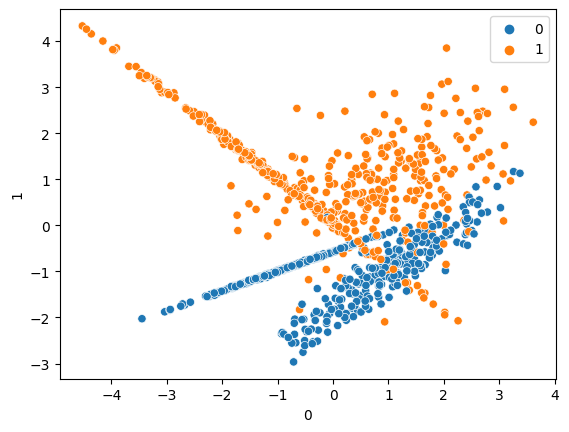

In [9]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                        test_size=0.25,random_state=10)

In [24]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')

In [13]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [14]:
svc.coef_

array([[-0.46136343,  2.14497717]])

In [15]:
## prediction
y_pred = svc.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1])

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [17]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90       127
           1       0.95      0.81      0.88       123

    accuracy                           0.89       250
   macro avg       0.90      0.89      0.89       250
weighted avg       0.90      0.89      0.89       250

[[122   5]
 [ 23 100]]
0.888


## Hyper-parameter Tunning with SVC

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    "C":[0.1, 1, 10, 100, 1000],
    "gamma":[1,0.1,0.01,0.0001,0.0001],
    "kernel":['linear']
}

In [29]:
grid = GridSearchCV(SVC(), param_grid=param_grid, refit=True, cv=5
                ,verbose=3)

In [30]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.927 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.920 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.940 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.933 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.920 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.927 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.920 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.940 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.933 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.920 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.927 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

[CV 2/5] END ....C=1000, gamma=1, kernel=linear;, score=0.920 total time=   0.3s
[CV 3/5] END ....C=1000, gamma=1, kernel=linear;, score=0.947 total time=   5.0s
[CV 4/5] END ....C=1000, gamma=1, kernel=linear;, score=0.933 total time=   0.3s
[CV 5/5] END ....C=1000, gamma=1, kernel=linear;, score=0.920 total time=   2.0s
[CV 1/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.933 total time=   0.4s
[CV 2/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.920 total time=   0.3s
[CV 3/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.947 total time=   4.8s
[CV 4/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.933 total time=   0.3s
[CV 5/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.920 total time=   1.8s
[CV 1/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.933 total time=   0.4s
[CV 2/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.920 total time=   0.3s
[CV 3/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.947 total time=   4.9s
[CV 4/5] END .C=1000, gamma=

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.0001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [32]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'linear'}

In [31]:
## pridiction
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90       127
           1       0.95      0.81      0.88       123

    accuracy                           0.89       250
   macro avg       0.90      0.89      0.89       250
weighted avg       0.90      0.89      0.89       250

[[122   5]
 [ 23 100]]
0.888
